In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


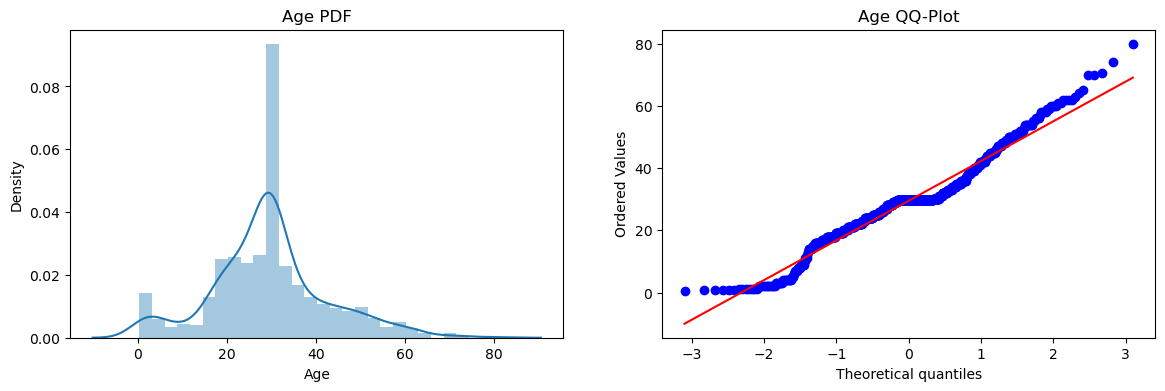

In [13]:
# visualise the data

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ-Plot")

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


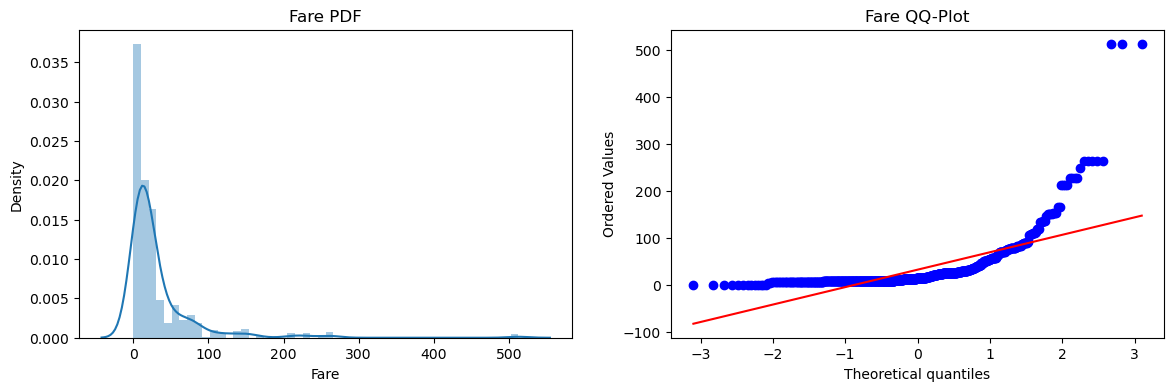

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(x_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ-Plot")

plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf1.fit(x_train, y_train)
y_pred_logit = clf1.predict(x_test)

clf2.fit(x_train, y_train)
y_pred_dt = clf2.predict(x_test)

print("Accuracy Logit", accuracy_score(y_test, y_pred_logit))


print("Accuracy DT", accuracy_score(y_test, y_pred_dt))

Accuracy Logit 0.6480446927374302
Accuracy DT 0.659217877094972


# Transformation approach

In [18]:
trf = FunctionTransformer(func=np.log1p)

In [19]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.fit_transform(x_test)

In [20]:
clf1.fit(x_train_transform, y_train)
y_pred_logit = clf1.predict(x_test_transform)

clf2.fit(x_train_transform, y_train)
y_pred_dt = clf2.predict(x_test_transform)

print("Accuracy Logit", accuracy_score(y_test, y_pred_logit))


print("Accuracy DT", accuracy_score(y_test, y_pred_dt))

Accuracy Logit 0.6815642458100558
Accuracy DT 0.6815642458100558


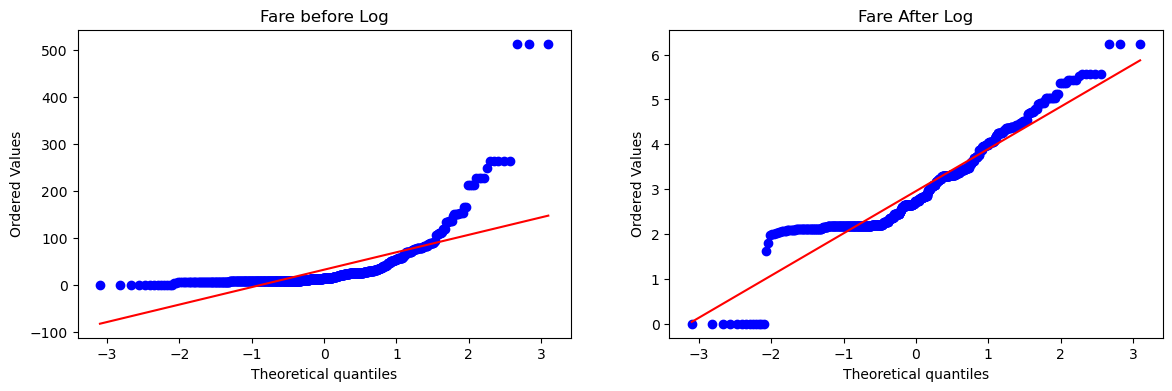

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title("Fare before Log")

plt.subplot(1,2,2)
stats.probplot(x_train_transform['Fare'], dist="norm", plot=plt)
plt.title("Fare After Log")

plt.show()

# Box Cox Approach

In [23]:
df = pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]


In [27]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [30]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
# Regression model
from sklearn.metrics import r2_score

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))


0.6275531792314851


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


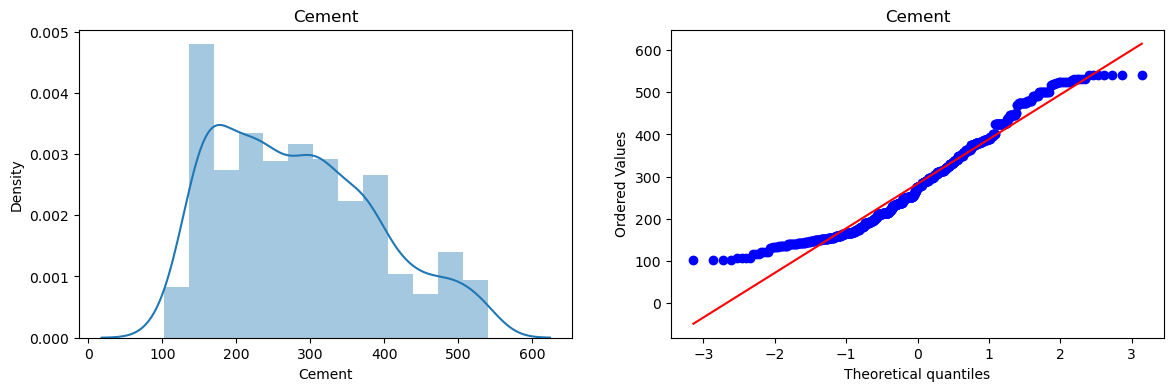

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


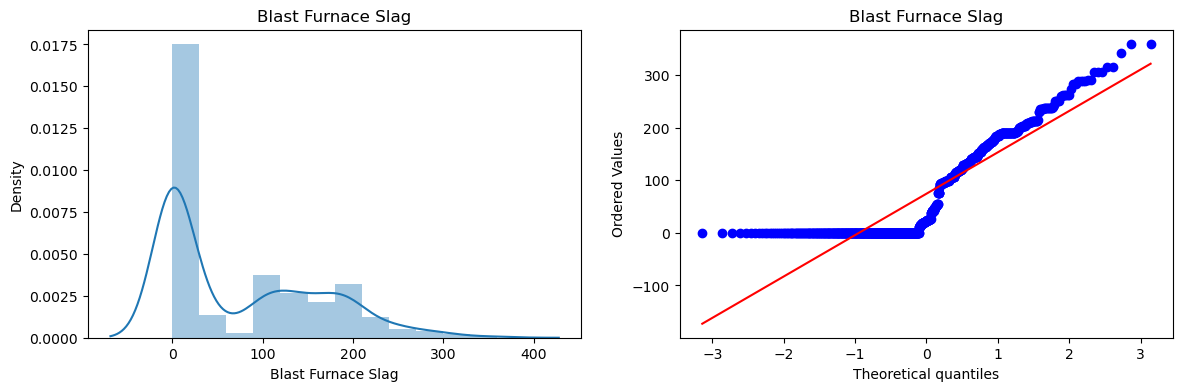

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


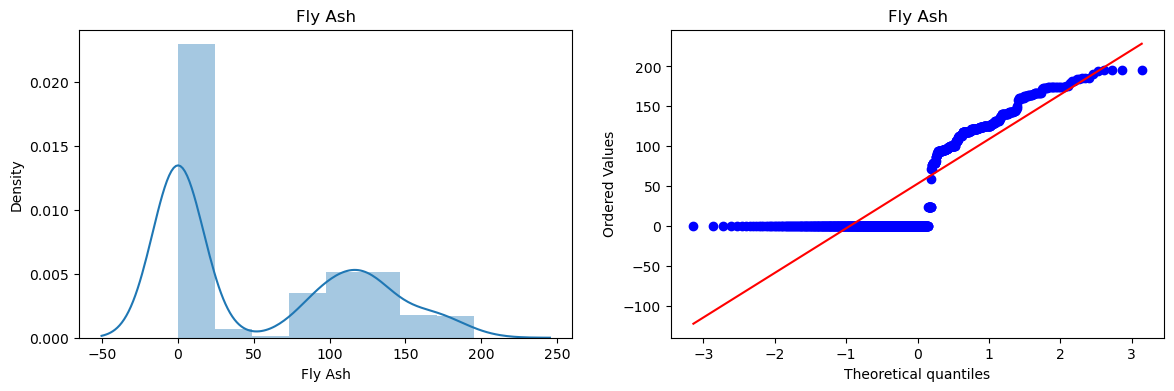

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


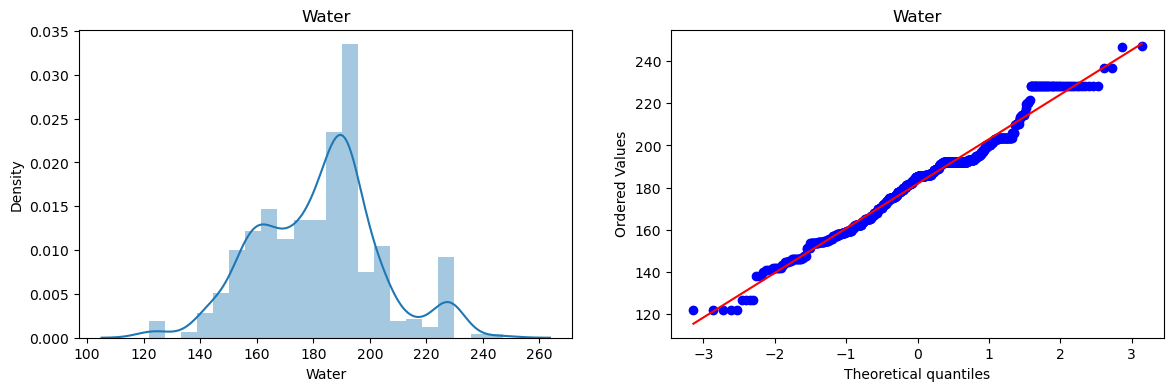

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


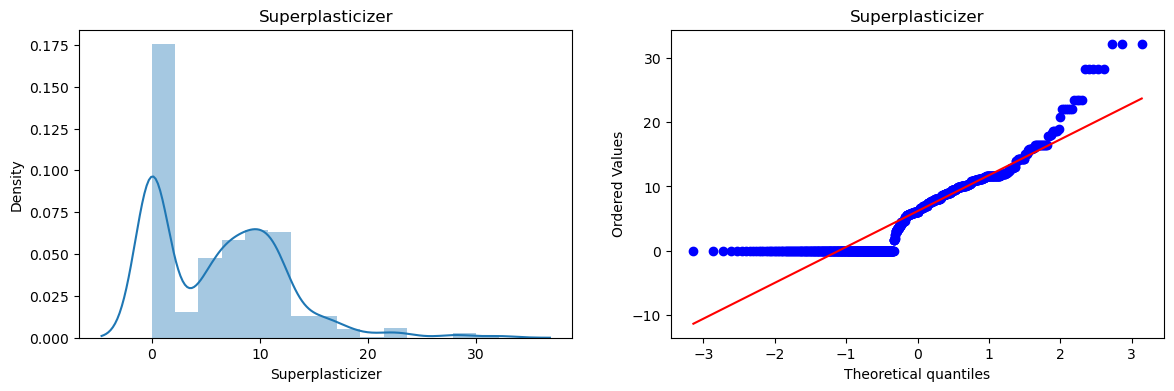

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


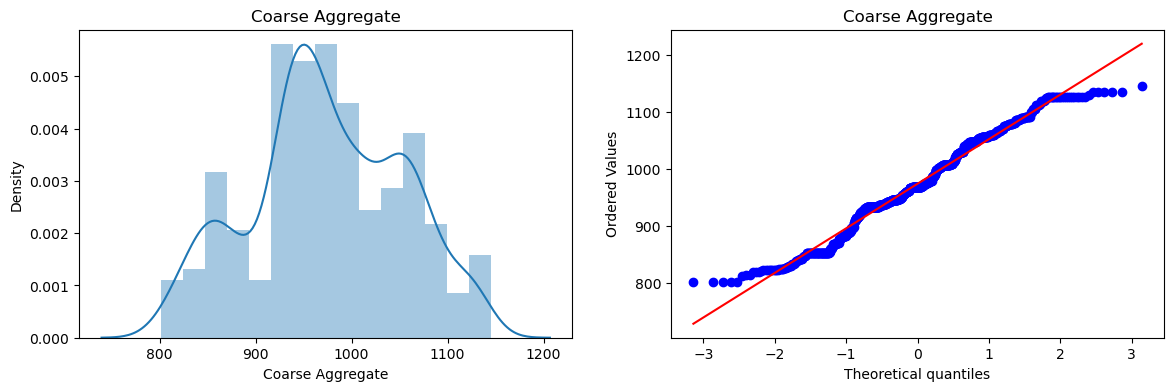

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


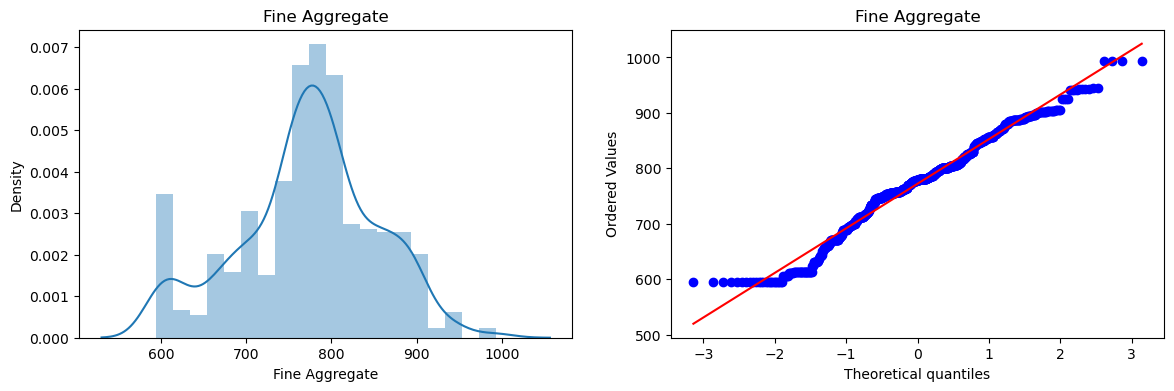

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


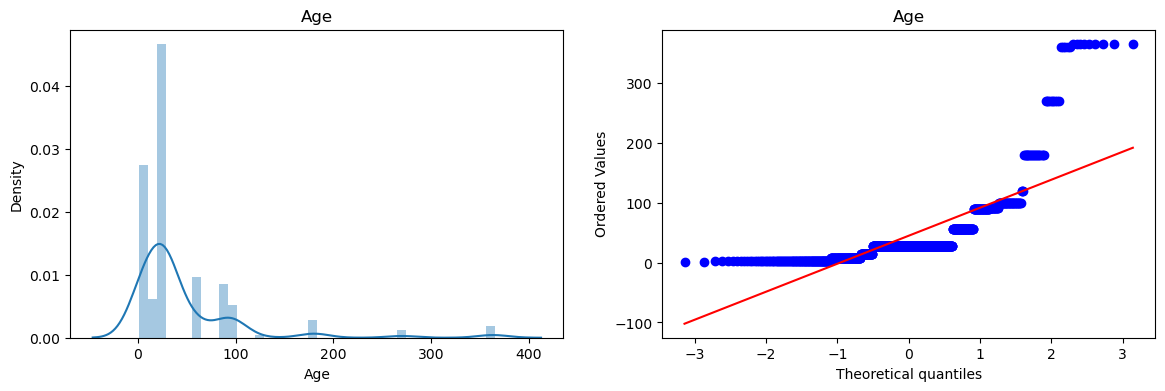

In [36]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    
    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot= plt)
    plt.title(col)
    
    plt.show()

In [41]:
# Applying Box-Cox Transformation
from sklearn.preprocessing import PowerTransformer

pw = PowerTransformer(method='box-cox')
x_train_transform = pw.fit_transform(x_train + 0.00001)
x_test_transform = pw.fit_transform(x_test +0.00001)

In [40]:
pd.DataFrame({'col':x_train.columns, "box_cox_lambdas": pw.lambdas_})

,col,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.028899
2,Fly Ash,-0.007561
3,Water,0.959062
4,Superplasticizer,0.119398
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [42]:
lr = LinearRegression()
lr.fit(x_train_transform, y_train)
y_pred = lr.predict(x_test_transform)
print(r2_score(y_test, y_pred))

0.8061415970707901


In [43]:
x_train_transformed = pd.DataFrame(x_train_transform, columns=x_train.columns)
x_train_transformed


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.960702,1.128203,-0.301920,0.919073,-0.262500,-0.677568,0.106010
1,1.244706,0.672998,1.139074,-0.165055,0.745745,-1.912728,-0.314062,0.106010
2,0.079842,-1.084755,1.132038,-1.047291,0.791178,1.018407,0.025957,-1.675970
3,-0.145641,0.894884,1.092185,0.581224,0.727899,-1.750779,0.583253,0.106010
4,-1.131044,0.769285,1.134025,-1.105297,0.817461,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,1.007172,-0.887164,-1.769923,0.828524,0.390563,0.358776,-1.675970
820,-0.198733,-1.084755,1.134565,-1.839129,0.849638,1.445973,0.322797,-0.475625
821,-0.844517,-1.084755,1.134632,-0.706089,0.791178,1.345367,0.297157,1.246733
822,1.565624,0.925921,-0.887164,-0.019311,0.759365,-1.537255,0.076211,0.106010


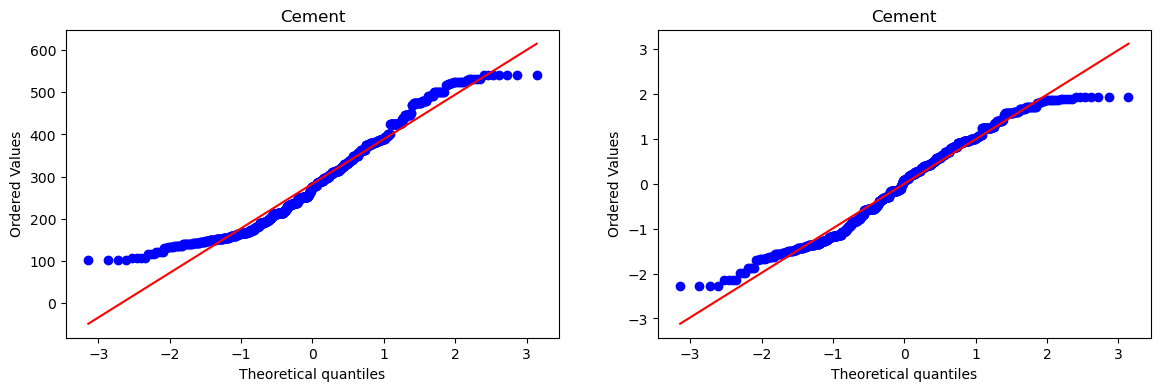

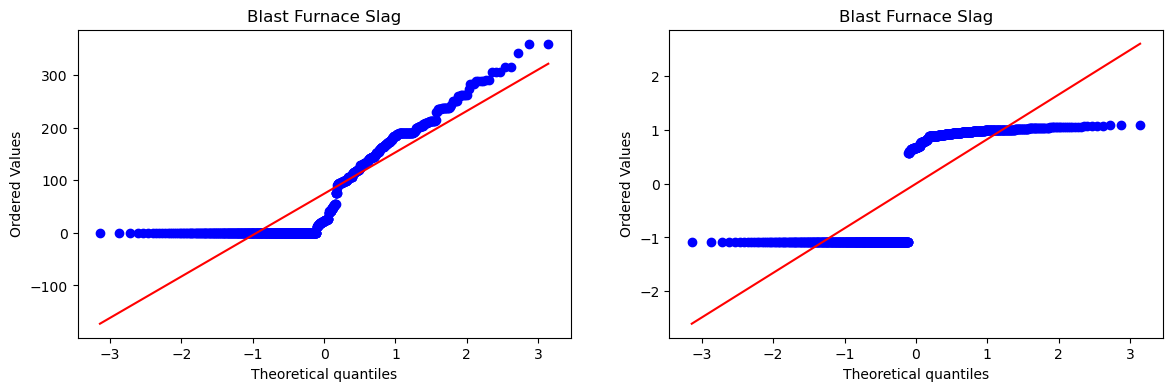

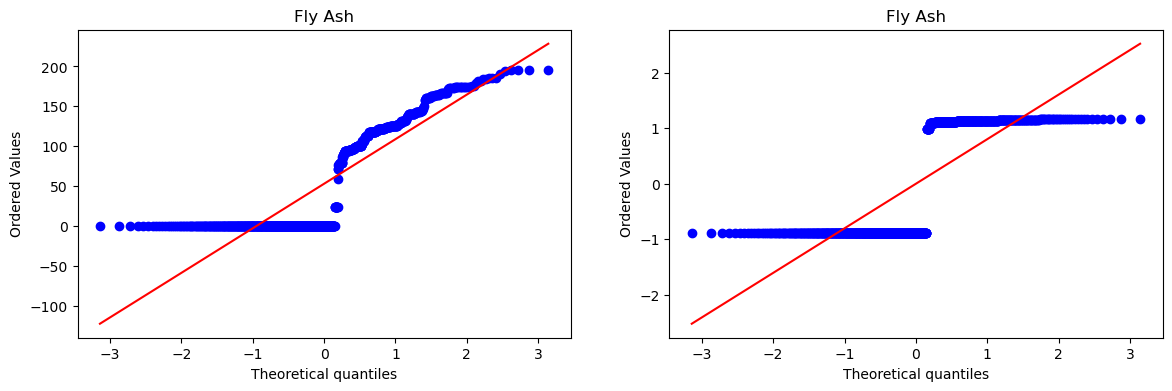

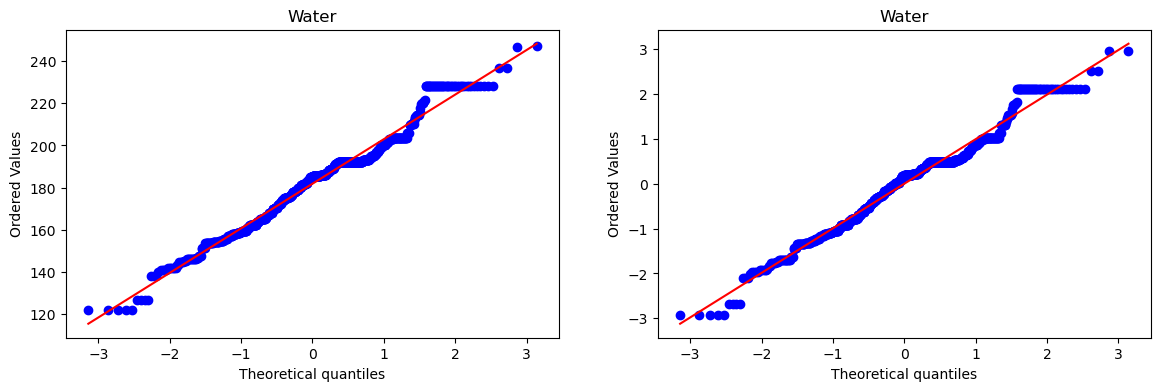

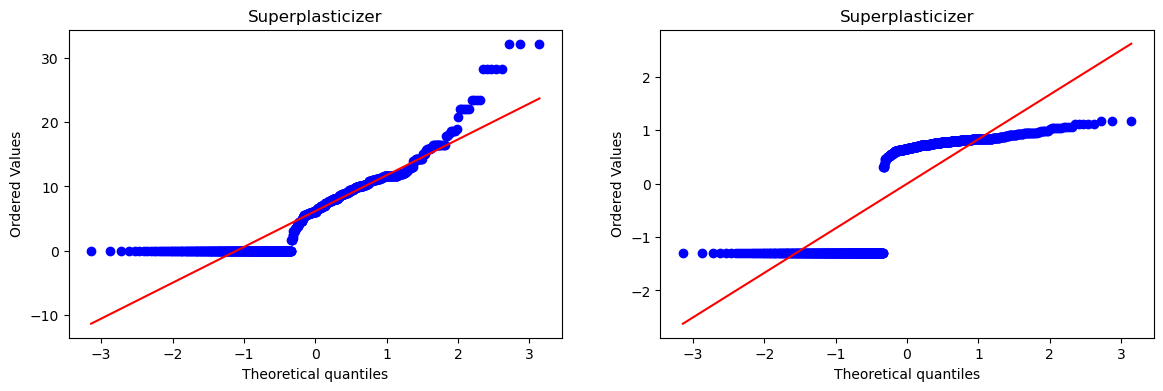

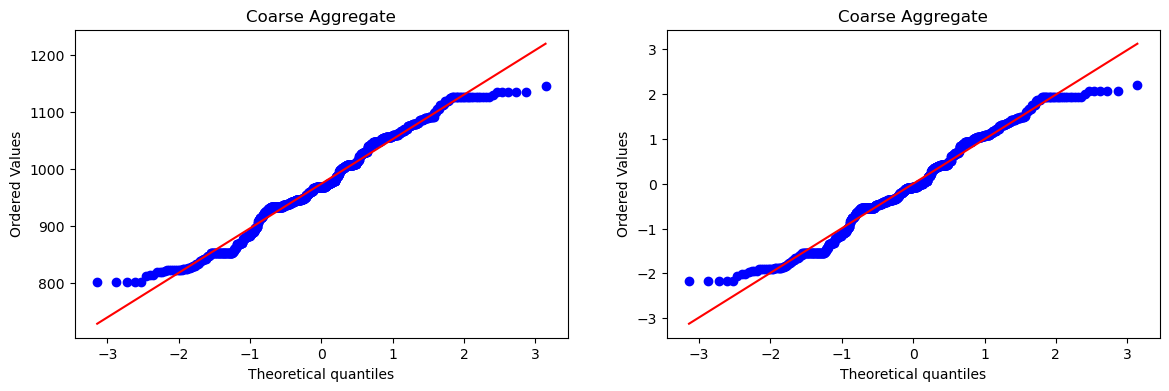

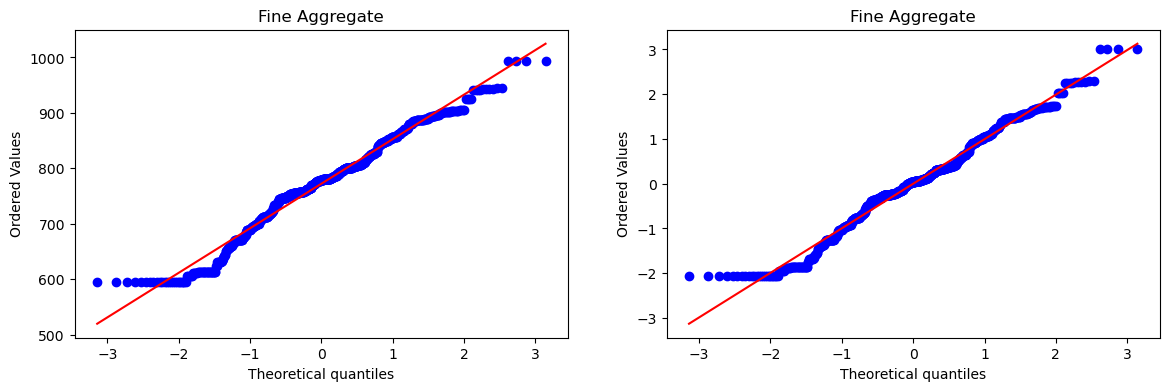

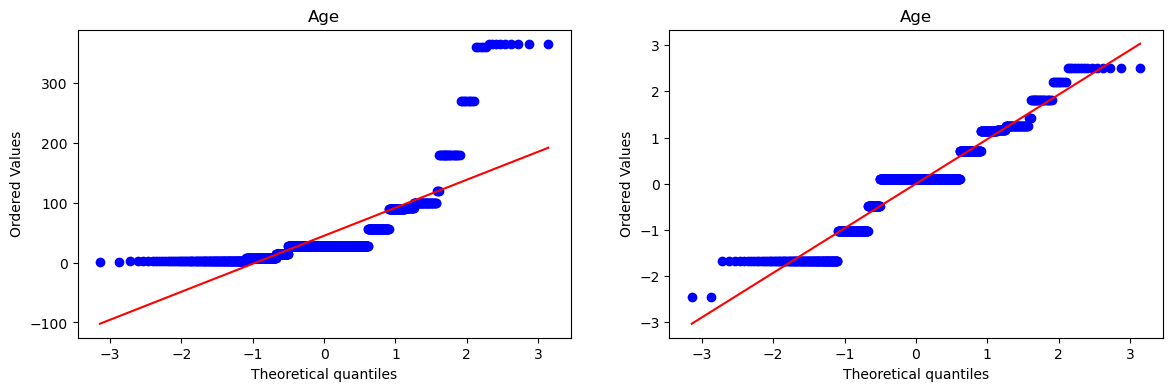

In [44]:
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x_train[col], dist='norm', plot= plt)
    plt.title(col)
    
    
    plt.subplot(122)
    stats.probplot(x_train_transformed[col], dist='norm', plot= plt)
    plt.title(col)
    
    plt.show()

# Yeo-Johnson Transforamtion approach

In [47]:
pt = PowerTransformer(method='yeo-johnson')
x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [48]:
lr = LinearRegression()
lr.fit(x_train_transform1, y_train)
y_pred = lr.predict(x_test_transform1)
print(r2_score(y_test, y_pred))

0.8153845515001845
